## Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Data Collection and Analysis

In [4]:
# Loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Mall_customers.csv')

In [5]:
# First five rows in the data frame
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Finding the number of rows and columns
customer_data.shape

(200, 5)

In [7]:
# Getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Choosing the Annual Income column and Spending Score Column

In [9]:
X = customer_data.iloc[:,[3,4]].values   # iloc to locate specific columns, .values aka all the values

In [10]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

### Choosing the correct number of clusters

Using the formula

WCSS -> Within Cluster Sum of Squares (determines the dist bw each cluster point and their centroid)


In [11]:
# Findig wcss value for different number of clusters

# We'll choose different number of clusters and then find the min wcss value among them

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  #random state  is completely random
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

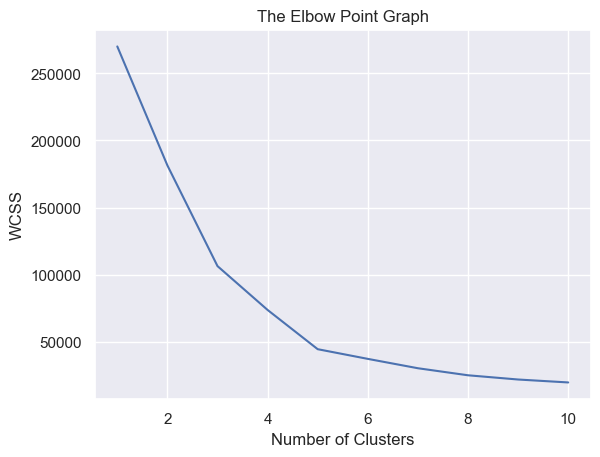

In [12]:
# Plot an elbow graph to find graph which has minimul value

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Since there is no significant drop in the graph, we'll just choose the cluster number as 5


Optimum Number of Clusters = 5

### Training k-Means Clustering Model

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state = 0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)  # will return a cluster number for each data point

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters - 0, 1, 2, 3, 4

### Visualising all the clusters

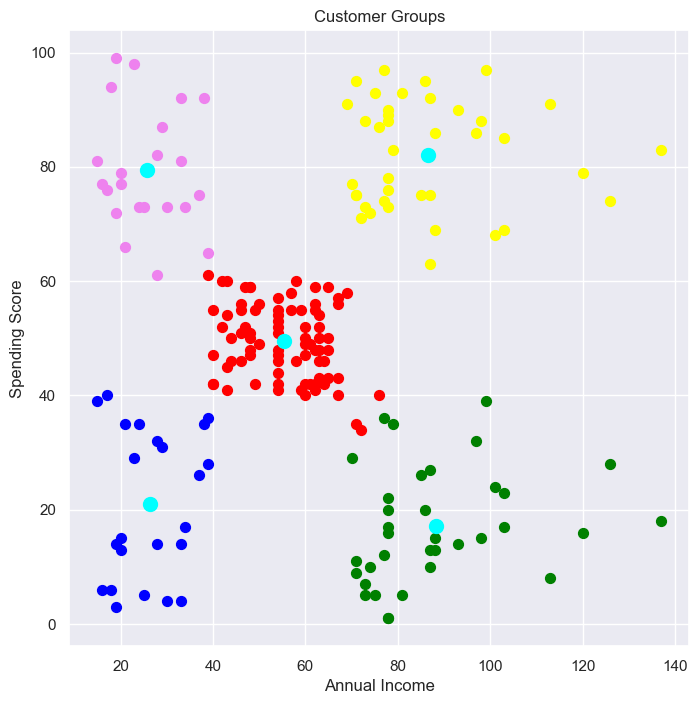

In [14]:
# Plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50,c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50,c='red', label='Cluster 1')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50,c='yellow', label='Cluster 1')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50,c='violet', label='Cluster 1')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50,c='blue', label='Cluster 1')
# 0, 1, 2, 3, 4 - represent cluster values
# 0 - represent first column -  annual income
# 1 - represent second column - spending score

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroid') # s is size, 0-xaxis of centroids 1- yaxis of centroids

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

## Let's find the spending vs annual income for women


In [15]:
df = customer_data[customer_data['Gender']=='Female']
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
...,...,...,...,...,...
191,192,Female,32,103,69
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


In [16]:
df.shape

(112, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 2 to 196
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              112 non-null    int64 
 1   Gender                  112 non-null    object
 2   Age                     112 non-null    int64 
 3   Annual Income (k$)      112 non-null    int64 
 4   Spending Score (1-100)  112 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 5.2+ KB


In [18]:
# Choosing only Annual income and annual spending score
W = df.iloc[:,[3,4]].values   # iloc to locate specific columns, .values aka all the values
print(W)

[[ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19  72]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 21  35]
 [ 23  98]
 [ 25   5]
 [ 28  14]
 [ 28  32]
 [ 29  31]
 [ 29  87]
 [ 30  73]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 43  54]
 [ 43  45]
 [ 44  50]
 [ 46  51]
 [ 47  52]
 [ 47  59]
 [ 48  50]
 [ 48  48]
 [ 48  47]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  53]
 [ 54  52]
 [ 54  42]
 [ 54  44]
 [ 54  57]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]
 [ 60  40]
 [ 60  42]
 [ 60  47]
 [ 60  50]
 [ 62  41]
 [ 62  48]
 [ 62  42]
 [ 63  50]
 [ 63  54]
 [ 64  42]
 [ 65  48]
 [ 65  50]
 [ 65  43]
 [ 65  59]
 [ 67  43]
 [ 67  57]
 [ 67  40]
 [ 69  58]
 [ 70  29]
 [ 70  77]
 [ 72  34]
 [ 72  71]
 [ 73  88]
 [ 73   7]
 [ 74  72]
 [ 75   5]
 [ 76  40]
 [ 76  87]
 [ 77  74]
 [ 78  22]
 [ 78  20]
 [ 78  76]
 [ 78  16]
 [ 78  89]
 [ 78  78]
 [ 78  73]

In [19]:
# Choosing the number of clusters
# Findig wcss value for different number of clusters

# We'll choose different number of clusters and then find the min wcss value among them

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  #random state  is completely random
    kmeans.fit(W)
    wcss.append(kmeans.inertia_)

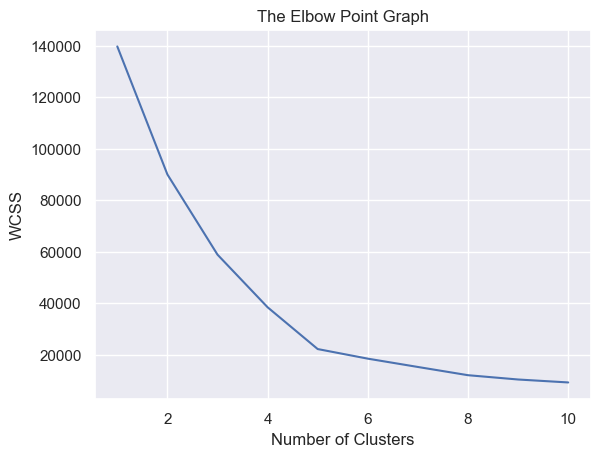

In [20]:
# Plot an elbow graph to find graph which has minimul value

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# The number of clusters is still 5

# Training the K-Means Clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state = 0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(W)  # will return a cluster number for each data point

print(Y)

[4 1 4 1 4 1 1 1 4 1 4 1 4 4 4 4 1 1 4 1 4 1 4 1 4 0 4 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3
 2 3 2 2 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 2 2 2 3 3 2 3 2 2 3 3 3 2 3 2 2 3 2
 3]


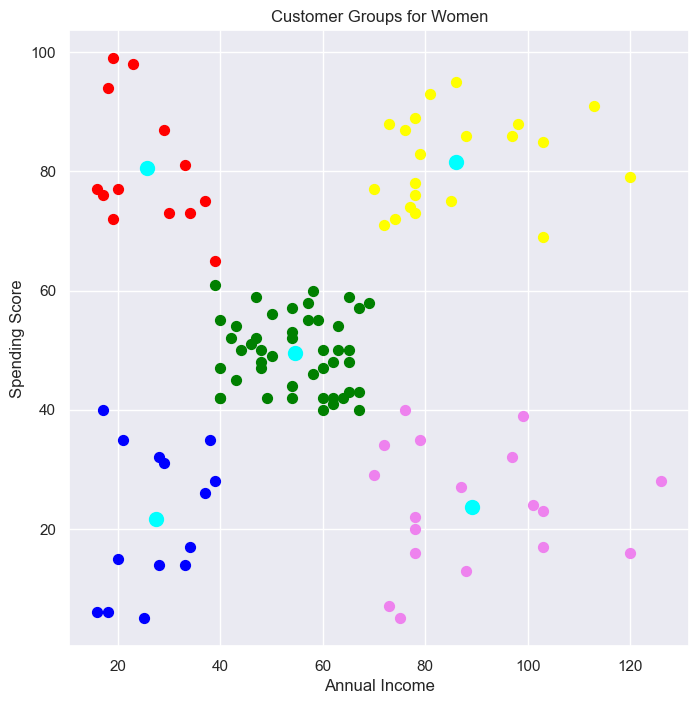

In [22]:
# Plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(W[Y==0,0], W[Y==0,1], s=50,c='green', label='Cluster 1')
plt.scatter(W[Y==1,0], W[Y==1,1], s=50,c='red', label='Cluster 1')
plt.scatter(W[Y==2,0], W[Y==2,1], s=50,c='yellow', label='Cluster 1')
plt.scatter(W[Y==3,0], W[Y==3,1], s=50,c='violet', label='Cluster 1')
plt.scatter(W[Y==4,0], W[Y==4,1], s=50,c='blue', label='Cluster 1')
# 0, 1, 2, 3, 4 - represent cluster values
# 0 - represent first column -  annual income
# 1 - represent second column - spending score

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroid') # s is size, 0-xaxis of centroids 1- yaxis of centroids

plt.title('Customer Groups for Women')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### The spending score distribution is almost the same for Women

## Let's find the spending vs annual income for Men


In [23]:
df = customer_data[customer_data['Gender']=='Male']
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13
...,...,...,...,...,...
187,188,Male,28,101,68
192,193,Male,33,113,8
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
df.shape

(88, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              88 non-null     int64 
 1   Gender                  88 non-null     object
 2   Age                     88 non-null     int64 
 3   Annual Income (k$)      88 non-null     int64 
 4   Spending Score (1-100)  88 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 4.1+ KB


In [26]:
# Choosing only Annual income and annual spending score
M = df.iloc[:,[3,4]].values   # iloc to locate specific columns, .values aka all the values
print(M)

[[ 15  39]
 [ 15  81]
 [ 19   3]
 [ 19  14]
 [ 20  13]
 [ 20  79]
 [ 21  66]
 [ 23  29]
 [ 24  35]
 [ 24  73]
 [ 25  73]
 [ 28  82]
 [ 28  61]
 [ 30   4]
 [ 33   4]
 [ 33  92]
 [ 38  92]
 [ 39  36]
 [ 42  60]
 [ 43  60]
 [ 43  41]
 [ 44  46]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 48  51]
 [ 48  59]
 [ 48  59]
 [ 49  55]
 [ 54  47]
 [ 54  54]
 [ 54  48]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  46]
 [ 59  41]
 [ 60  49]
 [ 60  52]
 [ 61  42]
 [ 61  49]
 [ 62  59]
 [ 62  55]
 [ 62  56]
 [ 63  46]
 [ 63  43]
 [ 63  48]
 [ 63  52]
 [ 64  46]
 [ 67  56]
 [ 69  91]
 [ 71  35]
 [ 71  95]
 [ 71  11]
 [ 71  75]
 [ 71   9]
 [ 71  75]
 [ 73   5]
 [ 73  73]
 [ 74  10]
 [ 75  93]
 [ 77  12]
 [ 77  97]
 [ 77  36]
 [ 78  90]
 [ 78  17]
 [ 78  88]
 [ 78   1]
 [ 78   1]
 [ 81   5]
 [ 85  26]
 [ 86  20]
 [ 87  63]
 [ 87  13]
 [ 87  75]
 [ 87  10]
 [ 87  92]
 [ 88  15]
 [ 88  69]
 [ 93  14]
 [ 93  90]
 [ 98  15]
 [ 99  97]
 [101  68]
 [113   8]
 [126  74]
 [137  18]
 [137  83]]


In [27]:
# Choosing the number of clusters
# Findig wcss value for different number of clusters

# We'll choose different number of clusters and then find the min wcss value among them

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)  #random state  is completely random
    kmeans.fit(M)
    wcss.append(kmeans.inertia_)

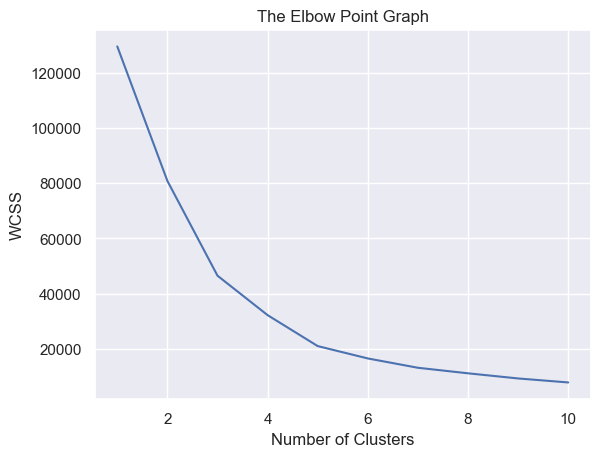

In [28]:
# Plot an elbow graph to find graph which has minimul value

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# The number of clusters is still 5

# Training the K-Means Clustering model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state = 0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(M)  # will return a cluster number for each data point

print(Y)

[1 4 1 1 1 4 4 1 1 4 4 4 4 1 1 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 0 0 0 0 2 0
 2 0 2 0 2 0 2 0 2 2 0 2 0 2]


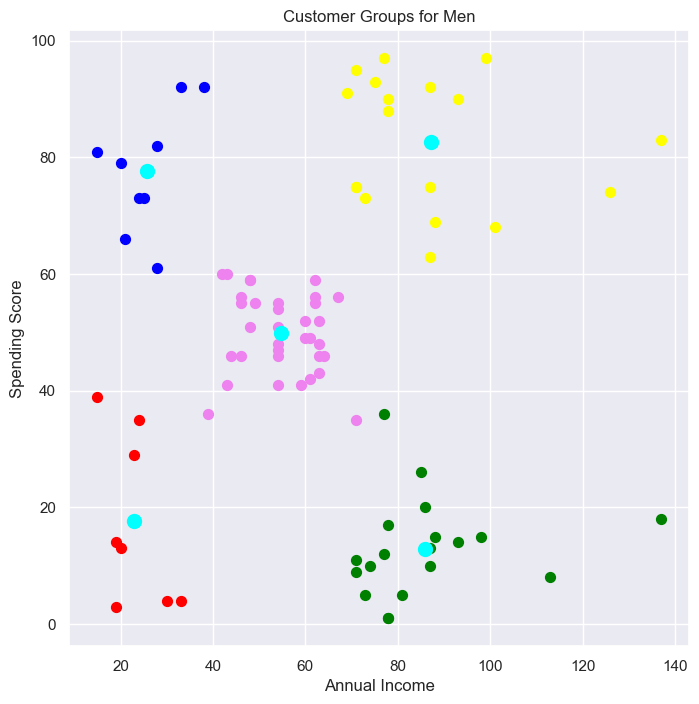

In [30]:
# Plotting all the clusters and their centroids

plt.figure(figsize=(8,8))
plt.scatter(M[Y==0,0], M[Y==0,1], s=50,c='green', label='Cluster 1')
plt.scatter(M[Y==1,0], M[Y==1,1], s=50,c='red', label='Cluster 1')
plt.scatter(M[Y==2,0], M[Y==2,1], s=50,c='yellow', label='Cluster 1')
plt.scatter(M[Y==3,0], M[Y==3,1], s=50,c='violet', label='Cluster 1')
plt.scatter(M[Y==4,0], M[Y==4,1], s=50,c='blue', label='Cluster 1')
# 0, 1, 2, 3, 4 - represent cluster values
# 0 - represent first column -  annual income
# 1 - represent second column - spending score

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s=100, c='cyan', label='Centroid') # s is size, 0-xaxis of centroids 1- yaxis of centroids

plt.title('Customer Groups for Men')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

### The spending distribution of Men is almost the same too